# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# Video zur Fourier Transormation

<br/>
<div style="background-color:lightyellow">
    
**Aufgabe 1:**

Seht euch - sofern nicht schon geschehen - folgendes [Video](https://youtu.be/spUNpyF58BY) an.
    
</div>

# STFT (basierend auf `np.fft`) selbst implementieren

Wie in der letzten Sitzung besprochen, basiert die die STFT auf dem Prinzip der Fensterung, welches wir wiederum am [8. Juni](../06/mikrotonale_intervalle_fensterung_amplituden-envelopes.ipynb) behandelt haben.

## Audio Laden

<br/>
<div style="background-color:lightyellow">
    
**Aufgabe 2:**

Ladet zunächst mit `lr.load` die Datei `../data/piano_major_scale.mp3`.
    
</div>

In [4]:
x, sr = lr.load('piano_major_scale.mp3')

# normalize
x = x / np.max(np.abs(x))

display(Audio(x, rate=sr))

## Hanning Window

Mit einem sog. Hanning Window kann man die Samples in der Mitte eines Fensters höher gewichten, als die zu Beginn und Ende eines Fensters.

<br/>
<div style="background-color:lightyellow">

**Aufgabe 3:**

Initialisiert ein Hanning Window mit der Länge $2048$ unter der Variable `hann` mit der Methode `np.hann`. Überprüft anhand eines Plots visuell, ob euer Hanning Window mit dem von [Wikipedia](https://de.wikipedia.org/wiki/Fensterfunktion#/media/Datei:Window_function_(hann).svg) übereinstimmt.

</div>

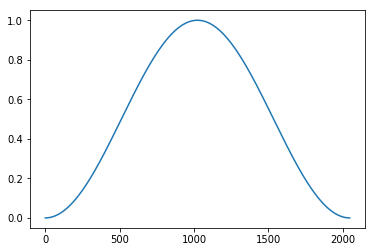

In [ ]:
plt.plot(np.hanning(2048))

## Fensterung

<br/>
<div style="background-color:lightyellow">

**Aufgabe 4:**

Schreibt eine Funktion `plot_windows`, in der ihr das jeweilige Fenster im Loop unter der Variable `win` speichert, sodass es geplottet wird.

</div>

In [5]:
def plot_windows(x, hop_length=512, window_size=2048):
    
    length = np.shape(x)[0]
    num_wins = (length - window_size) // hop_length
    # num_wins = int((length - window_size) / hop_length)
    
    for i in range(num_wins):
        start_i = i * hop_length
        stop_i = start_i + window_size
        win = x[start_i : stop_i]
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        win_ = np.concatenate((np.zeros(start_i), win, np.zeros(length - start_i - window_size)))
        plt.plot(win_)
        plt.ylim(-1, 1)
        plt.subplot(1, 2, 2)
        plt.plot(win)
        plt.ylim(-1, 1)
        plt.show()

plot_windows(x)

Output hidden; open in https://colab.research.google.com to view.

## Plotten mit Hanning Window

<br/>
<div style="background-color:lightyellow">

**Aufgabe 5:**

Wandelt die letzte Funktion zu `plot_windows_hann` (ihr könnt den Großteil des Codes aus Aufgabe 4 kopieren) um, in der ihr das jeweilige Fenster im Loop mit dem Hanning Window aus Aufgabe 3 multipliziert wird.

</div>

In [6]:
def plot_windows(x, hop_length=512, window_size=2048):
    
    length = np.shape(x)[0]
    num_wins = (length - window_size) // hop_length
    
    hann = np.hanning(window_size)
    
    for i in range(num_wins):
        start_i = i * hop_length
        win = x[start_i : start_i + window_size]
        win = win * hann
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        win_ = np.concatenate((np.zeros(start_i), win, np.zeros(length - start_i - window_size)))
        plt.plot(win_)
        plt.ylim(-1, 1)
        plt.subplot(1, 2, 2)
        plt.plot(win)
        plt.plot(hann)
        plt.ylim(-1, 1)
        plt.show()

plot_windows(x)

Output hidden; open in https://colab.research.google.com to view.

## 'Putting it all together'

<br/>
<div style="background-color:lightyellow">

**Aufgabe 6:**

Wandelt die letzte Funktion zu `calc_stft` (ihr könnt den Großteil des Codes aus Aufgabe 5 kopieren) um.

Hier muss zunächst ein multidimensionaler Array `stft` mit Nullen so gefüllt werden, dass er den 'Shape' `(window_size // 2, num_wins)` und den Datentyp (keyword `dtype`) `complex` hat.

Im Loop wird dann jeweils eine Spalte des `stft`-Arrays mit der DFT des Fensters geschrieben.

</div>

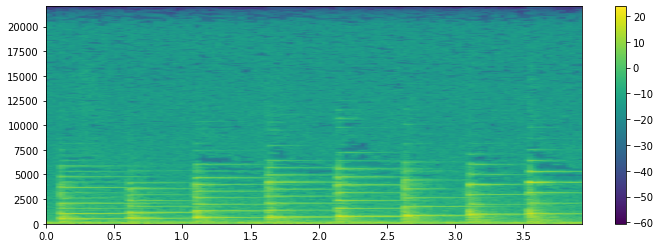

In [23]:
def calc_stft(x, hop_length=512, window_size=2048):
    
    length = np.shape(x)[0]
    num_wins = (length - window_size) // hop_length
    
    stft = np.zeros((window_size // 2, num_wins), dtype=complex)
    
    for i in range(num_wins):
        start_i = i * hop_length
        win = x[start_i : start_i + window_size]
        win = win * np.hanning(window_size)
        
        stft[:, i] = np.fft.fft(win)[: window_size // 2]
        
    return stft

stft = calc_stft(x)
plt.figure(figsize=(12, 4))
plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
plt.colorbar()
plt.show()

In [20]:
sr

22050

In [18]:
a = np.reshape(np.arange(16), (4, 4))
win_length = 4
print(a)

print('\n', a[1, 2])

print('\n', a[ : , 2])

print('\n', a[1:3 , 2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

 6

 [ 2  6 10 14]

 [ 6 10]


ValueError: ignored

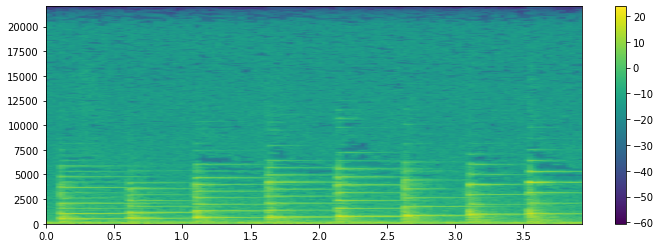

In [31]:
def calc_stft(x, hop_length=512, window_size=2048):
    
    length = np.shape(x)[0]
    num_wins = (length - window_size) // hop_length
    
    stft = np.zeros((window_size // 2, num_wins), dtype=complex)
    
    for i in range(num_wins):
        start_i = i * hop_length
        win = x[start_i : start_i + window_size]
        win = win * np.hanning(window_size)
        
        stft[:, i] = np.fft.fft(win)[: window_size // 2]
        
    return stft

stft = calc_stft(x)
plt.figure(figsize=(12, 4))
plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
# plt.ylim(0, sr / 2)
plt.colorbar()
plt.show()